<a href="https://colab.research.google.com/github/argos2002/DeepLearningProject/blob/main/Classification_CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [18]:
(X_train, y_train),(X_test, y_test) = cifar100.load_data()

# Normalizing the  data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Number of classes
nb_classes = len(np.unique(y_train))

# Size of Image
img_width, img_height, img_num_channels = 32, 32, 3
input_shape = (img_width, img_height, img_num_channels)

# Converting class vectors to binary class matrices
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

In [19]:
model = Sequential()
# 128 and not only 32 filters because there are 100 classes. 32 filters gave bad results.
model.add(Conv2D(128, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 activation_16 (Activation)  (None, 32, 32, 128)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 128)       147584    
                                                                 
 activation_17 (Activation)  (None, 30, 30, 128)       0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 15, 15, 256)       295168    
                                                      

In [20]:
from tensorflow.keras.optimizers import legacy
model.compile(loss='categorical_crossentropy',optimizer=legacy.Adam(learning_rate=0.0001, decay=1e-6),metrics=['accuracy'])

In [21]:
datagen = ImageDataGenerator(
featurewise_center=False,
samplewise_center=False,
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False,
rotation_range=0,
width_shift_range=0.1,
height_shift_range=0.1,
horizontal_flip=True,
vertical_flip=False)
datagen.fit(X_train)


In [22]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8, restore_best_weights = True)

# Fitting data to the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=50),
steps_per_epoch=X_train.shape[0] // 50,
epochs=600,
validation_data=(X_test, y_test),
verbose=1,
callbacks=[early_stop])


Epoch 1/600
1000/1000 [==============================] - 57s 56ms/step - loss: 4.2857 - accuracy: 0.0404 - val_loss: 3.8518 - val_accuracy: 0.1032
Epoch 2/600
1000/1000 [==============================] - 46s 46ms/step - loss: 3.7447 - accuracy: 0.1201 - val_loss: 3.3989 - val_accuracy: 0.1825
Epoch 3/600
1000/1000 [==============================] - 47s 47ms/step - loss: 3.3873 - accuracy: 0.1805 - val_loss: 3.1230 - val_accuracy: 0.2441
Epoch 4/600
1000/1000 [==============================] - 46s 46ms/step - loss: 3.1240 - accuracy: 0.2302 - val_loss: 2.8803 - val_accuracy: 0.2863
Epoch 5/600
1000/1000 [==============================] - 47s 47ms/step - loss: 2.9219 - accuracy: 0.2681 - val_loss: 2.6214 - val_accuracy: 0.3373
Epoch 6/600
1000/1000 [==============================] - 46s 46ms/step - loss: 2.7396 - accuracy: 0.3040 - val_loss: 2.4774 - val_accuracy: 0.3661
Epoch 7/600
1000/1000 [==============================] - 46s 46ms/step - loss: 2.5798 - accuracy: 0.3354 - val_loss: 2

In [23]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.3989737033843994 / Test accuracy: 0.6209999918937683


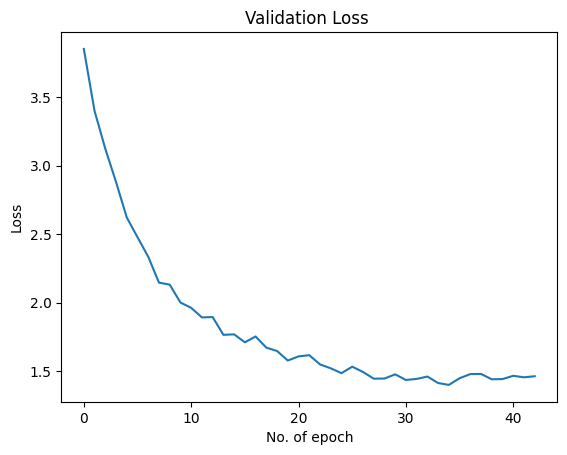

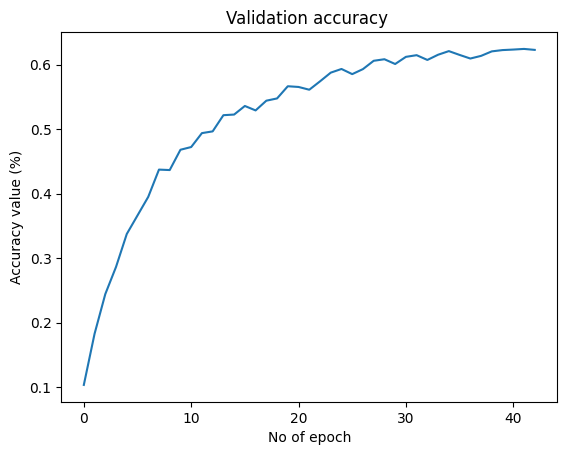

In [24]:
# Visualizing the  history
# Plot Loss History
plt.plot(history.history['val_loss'])
plt.title('Validation Loss ')
plt.ylabel('Loss')
plt.xlabel('No. of epoch')
plt.show()

# Plot Accuraccy History
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy ')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No of epoch')
plt.show()

In [29]:
class_labels = {
    0: 'apple', 1: 'aquarium_fish', 2: 'baby', 3: 'bear', 4: 'beaver', 5: 'bed', 6: 'bee', 7: 'beetle',
    8: 'bicycle', 9: 'bottle', 10: 'bowl', 11: 'boy', 12: 'bridge', 13: 'bus', 14: 'butterfly', 15: 'camel',
    16: 'can', 17: 'castle', 18: 'caterpillar', 19: 'cattle', 20: 'chair', 21: 'chimpanzee', 22: 'clock',
    23: 'cloud', 24: 'cockroach', 25: 'couch', 26: 'crab', 27: 'crocodile', 28: 'cup', 29: 'dinosaur',
    30: 'dolphin', 31: 'elephant', 32: 'flatfish', 33: 'forest', 34: 'fox', 35: 'girl', 36: 'hamster',
    37: 'house', 38: 'kangaroo', 39: 'computer_keyboard', 40: 'lamp', 41: 'lawn_mower', 42: 'leopard',
    43: 'lion', 44: 'lizard', 45: 'lobster', 46: 'man', 47: 'maple_tree', 48: 'motorcycle', 49: 'mountain',
    50: 'mouse', 51: 'mushroom', 52: 'oak_tree', 53: 'orange', 54: 'orchid', 55: 'otter', 56: 'palm_tree',
    57: 'pear', 58: 'pickup_truck', 59: 'pine_tree', 60: 'plain', 61: 'plate', 62: 'poppy', 63: 'porcupine',
    64: 'possum', 65: 'rabbit', 66: 'raccoon', 67: 'ray', 68: 'road', 69: 'rocket', 70: 'rose', 71: 'sea',
    72: 'seal', 73: 'shark', 74: 'shrew', 75: 'skunk', 76: 'skyscraper', 77: 'snail', 78: 'snake', 79: 'spider',
    80: 'squirrel', 81: 'streetcar', 82: 'sunflower', 83: 'sweet_pepper', 84: 'table', 85: 'tank', 86: 'telephone',
    87: 'television', 88: 'tiger', 89: 'tractor', 90: 'train', 91: 'trout', 92: 'tulip', 93: 'turtle', 94: 'wardrobe',
    95: 'whale', 96: 'willow_tree', 97: 'wolf', 98: 'woman', 99: 'worm'
}


313/313 [==============================] - 2s 6ms/step


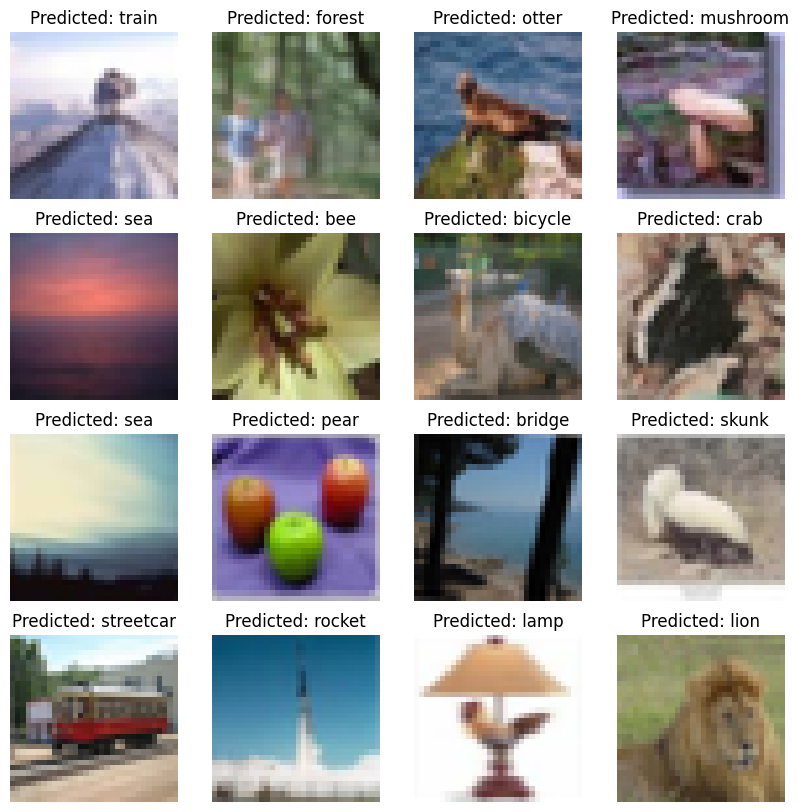

In [30]:
# Making predictions on the test data
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Display a few images with their predicted classes
plt.figure(figsize=(10, 10))
for i in range(16):  # Displaying 16 images
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {class_labels[predicted_classes[i]]}")
    plt.axis('off')

plt.show()